# A Finite Element Examples: Frame 01c

This example is based on the frame01 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# ========== setting mesh parameters ==============

N = 16         # number of elements in the mesh
L = 100.0     # column free length


# ========== setting material parameters ==============

params = dict(
    E = 20000.,    # Young's modulus
    A = 100.0,     # cross section area
    I = 10.0       # cross section moment of inertia
)

# ========== setting load parameters ==============

w   = -0.1         # uniform lateral load on the column
Pcr = np.pi**2 * params['E'] * params['I'] / L**2    # Euler buckling load

# ========== setting analysis parameters ==============

target_load_level = 0.95      # 99% of Euler load
max_steps = 10                # solve max_steps points on the primary path



# define a list of target load levels
load_levels = np.linspace(0, target_load_level, max_steps)

#
# ==== Build the system model ====
#

model = System()
model.setSolver(NewtonRaphsonSolver())

# create nodes

nd0 = Node(0.0, 0.0)
model += nd0

ndi = nd0
for i in range(N):
    # nodes
    ndj = Node( (i+1)*L/N, 0.0 )
    model += ndj

    # elements
    elem = Frame2D(ndi, ndj, ElasticSection(params))
    model += elem

    # ** apply the element portion of the reference load
    elem.setDistLoad(w)

    ndi = ndj    # jump to next element: make current end-node the next start-node

# define support(s)

nd0.fixDOF('ux', 'uy', 'rz')    # horizontal support left end
ndi.fixDOF('uy')          # vertical support right end

for i in range(N//4):
    # nodes
    ndj = Node( L+(i+1)*L/N, 0.0 )
    model += ndj

    # elements
    elem = Frame2D(ndi, ndj, ElasticSection(params))
    model += elem

    # ** apply the element portion of the reference load
    elem.setDistLoad(w)

    ndi = ndj    # jump to next element: make current end-node the next start-node

# ==== complete the reference load ====

# these are only nodal forces as part of the reference load
# .. load only the upper node
ndi.setLoad((-Pcr,), ('ux',))


## Analyze the model

## Stability Analysis

In [4]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # not doing anything yet, but will do the data collection soon

detKt   = []
lambdas = []

# solve for all load_levels
for loadfactor in load_levels:

    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    lambdas.append(model.loadfactor)
    detKt.append(model.solver.checkStability())

    # report results
    print('+')
    #model.report()

    print("\n=== next load level ===\n")


norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.2555990021373087

+

=== next load level ===

norm of the out-of-balance force:   2.0838e+01
norm of the out-of-balance force:   1.6309e-02
norm of the out-of-balance force:   5.1886e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.0104375104086247

+

=== next load level ===

norm of the out-of-balance force:   2.0838e+01
norm of the out-of-balance force:   3.7238e-02
norm of the out-of-balance force:   2.4577e-10
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.7591977462798154

+

=== next load level ===

norm of the out-of-balance force:   2.0838e+01
norm of the out-of-balance force:   6.5291e-02
norm of the out-of-balance force:   2.1328e-10
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.5015226541571878

+

=== next load level ===

norm of the out-of-balance force:   2.0838e+01
norm of the out-of-balance force:   1.0492e-01
norm of the out-of-balance f

In [5]:
#
# ==== check the current state of the model ===
#

#model.report()

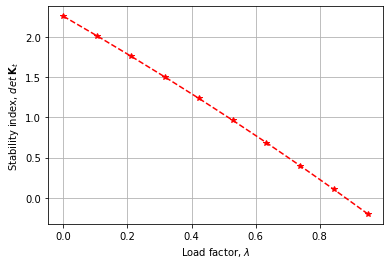

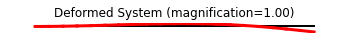

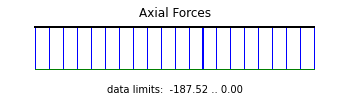

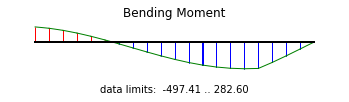

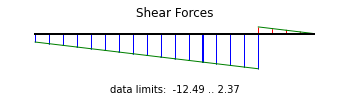

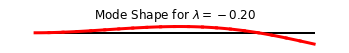

In [6]:
#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.plotBucklingMode(factor=10.)


In [7]:
load_levels

array([0.        , 0.10555556, 0.21111111, 0.31666667, 0.42222222,
       0.52777778, 0.63333333, 0.73888889, 0.84444444, 0.95      ])

norm of the out-of-balance force:   1.0858e+02
norm of the out-of-balance force:   1.9846e+01
norm of the out-of-balance force:   1.6398e-10
+

 ** Stability check: (smallest eigenvalue of Kt) = -1.9220534505899818



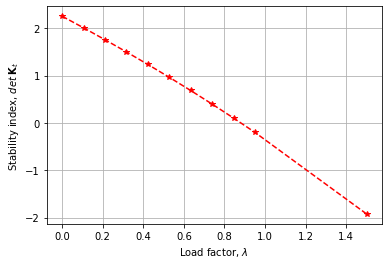

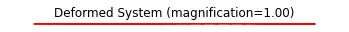

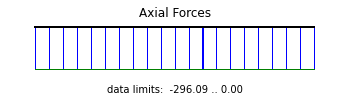

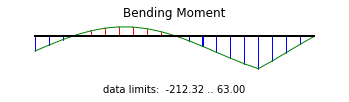

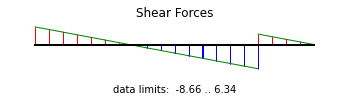

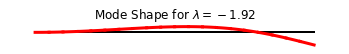

In [8]:
model.setLoadFactor(1.5)
model.solve(verbose=True)

# stability check
lambdas.append(model.loadfactor)
detKt.append(model.solver.checkStability())

#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.plotBucklingMode(factor=10.)


norm of the out-of-balance force:   9.8705e+01
norm of the out-of-balance force:   3.7967e+00
norm of the out-of-balance force:   2.0690e-10
+

 ** Stability check: (smallest eigenvalue of Kt) = -3.697834152548421



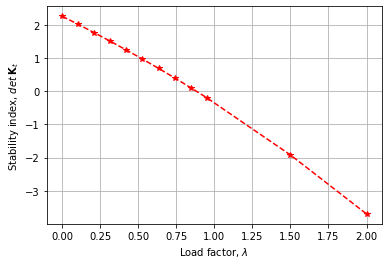

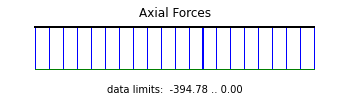

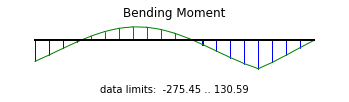

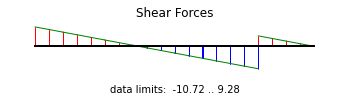

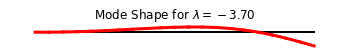

In [9]:
model.setLoadFactor(2.0)
model.solve(verbose=True)

# stability check
lambdas.append(model.loadfactor)
detKt.append(model.solver.checkStability())

#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.plotBucklingMode(factor=10.)
